In [1]:
%load_ext autoreload
%autoreload 2


import torch
from model import LofiModel
from config import *
from train import train
print(torch.__version__)
print(torch.version.cuda)

2.7.1+cu118
11.8


# Config

In [2]:
model = LofiModel()
print(model)
print(f"Model has {sum(p.numel() for p in model.parameters()) / 1e6:.2f} M parameters.\n")

LofiModel(
  (encoder): Encoder(
    (input_projection): Linear(in_features=128, out_features=128, bias=True)
    (lstm): LSTM(128, 512, num_layers=2, batch_first=True, bidirectional=True)
    (fc_mu): Linear(in_features=1024, out_features=512, bias=True)
    (fc_logvar): Linear(in_features=1024, out_features=512, bias=True)
  )
  (decoder): HierarchicalDecoder(
    (z_to_conductor_initial): Linear(in_features=512, out_features=2048, bias=True)
    (conductor): LSTM(1, 512, num_layers=2, batch_first=True)
    (note_projection): Linear(in_features=128, out_features=128, bias=True)
    (conductor_to_decoder_initial): Linear(in_features=512, out_features=2048, bias=True)
    (decoder_rnn): LSTM(640, 512, num_layers=2, batch_first=True)
    (output_projection): Linear(in_features=512, out_features=384, bias=True)
  )
)
Model has 19.93 M parameters.



# Training

Using device: cuda

Loading and preparing dataset...
Loading metadata from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\dataset\midi_metadata_dla_3_instrumentow.csv...
Processing MIDI files...


Processing files: 100%|██████████| 4084/4084 [00:54<00:00, 75.42it/s]


Successfully extracted 110479 bar-aligned segments.
Splitting dataset...
Dataset split into: Train=93907, Validation=16572
Finished preparing dataset.

Calculating class weights...


Analyzing dataset for weights: 100%|██████████| 2935/2935 [00:04<00:00, 687.16it/s]


Calculated class weights: [0.0015913216629996896, 0.6967747807502747, 0.3016338050365448]


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ziemmi13/lofi-vae/4e0eb4ca92af46398a87969c8ad4ad83



-----------------------------
----- Starting training -----
-----------------------------



Epoch 1/200 [Training]: 100%|██████████| 2935/2935 [05:57<00:00,  8.21it/s, Loss=0.4186, Recon=0.4186, KL=7.3596, beta=0.0000] 



Epoch 1 Summary: Avg Train Loss: 0.5653, Avg Val Loss: 1.1210

Generating visualization for epoch 1:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


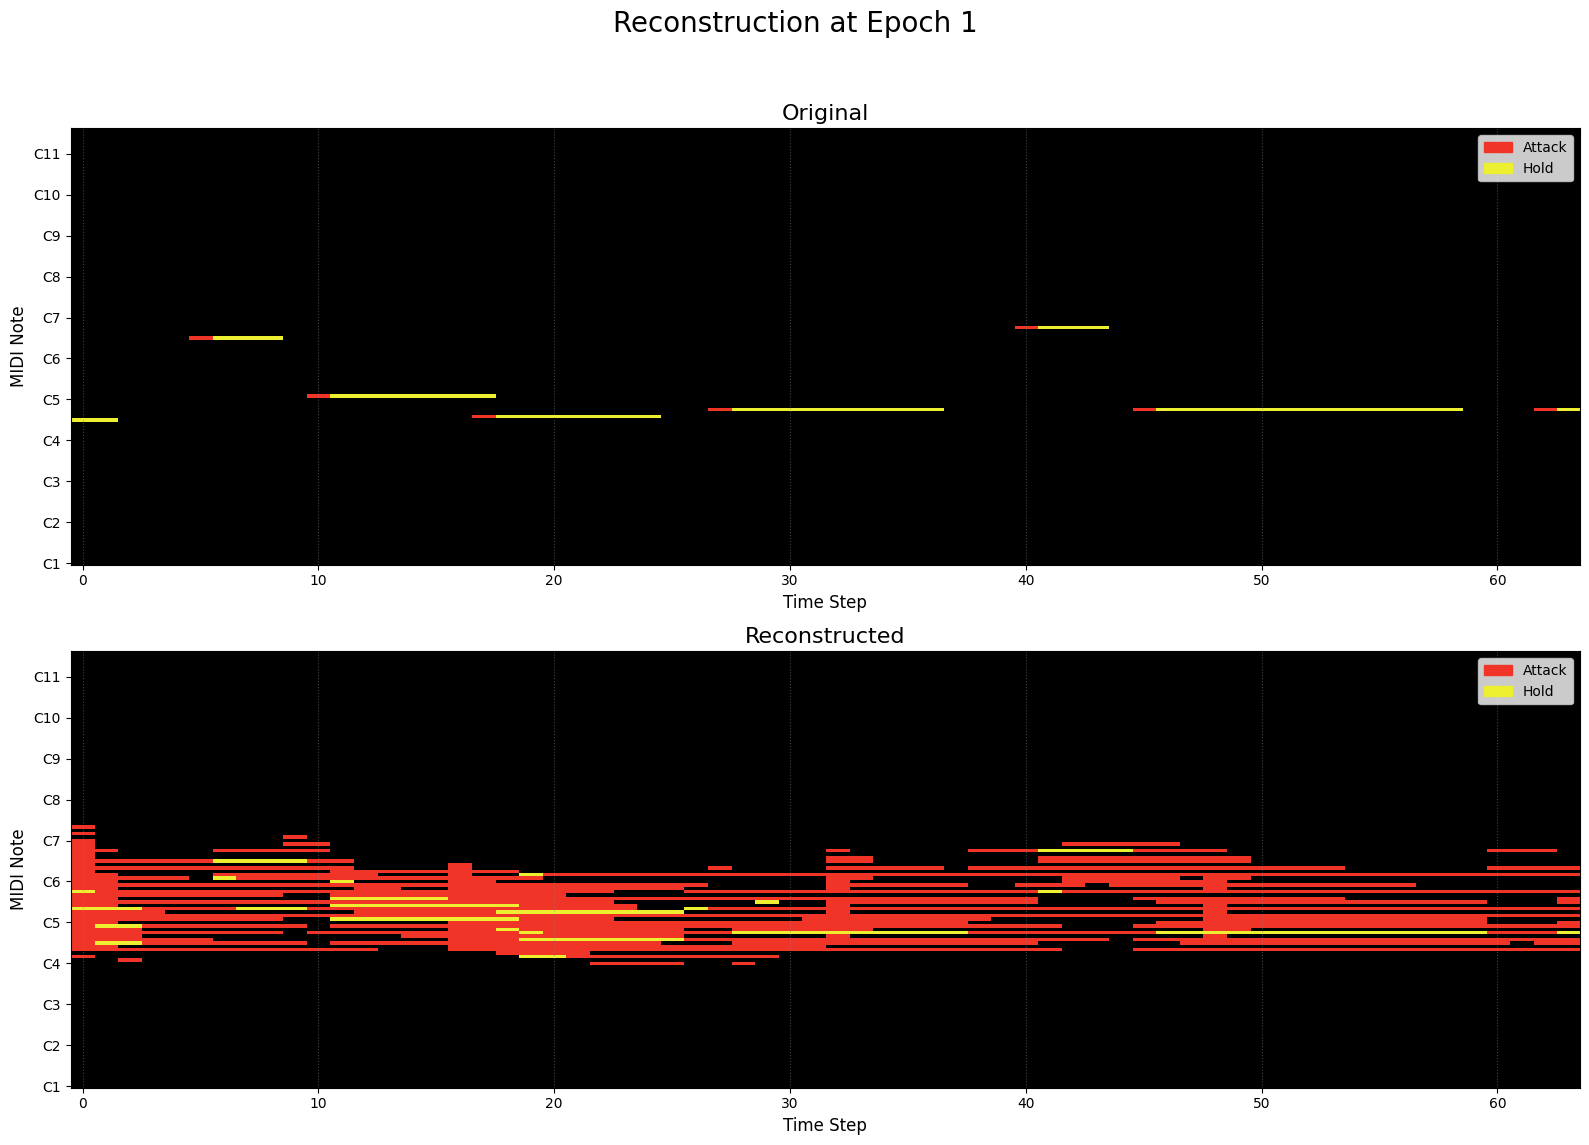

____________________________________________________________ 



Epoch 2/200 [Training]: 100%|██████████| 2935/2935 [06:27<00:00,  7.57it/s, Loss=0.3949, Recon=0.3949, KL=7.3926, beta=0.0000]



Epoch 2 Summary: Avg Train Loss: 0.4062, Avg Val Loss: 1.0613


Epoch 3/200 [Training]: 100%|██████████| 2935/2935 [06:42<00:00,  7.29it/s, Loss=0.4227, Recon=0.4227, KL=5.4489, beta=0.0000]



Epoch 3 Summary: Avg Train Loss: 0.3669, Avg Val Loss: 0.8438


Epoch 4/200 [Training]: 100%|██████████| 2935/2935 [06:03<00:00,  8.06it/s, Loss=0.3117, Recon=0.3117, KL=5.0496, beta=0.0000]



Epoch 4 Summary: Avg Train Loss: 0.3478, Avg Val Loss: 0.8294


Epoch 5/200 [Training]: 100%|██████████| 2935/2935 [05:53<00:00,  8.30it/s, Loss=0.3519, Recon=0.3519, KL=1.2466, beta=0.0000]



Epoch 5 Summary: Avg Train Loss: 0.3304, Avg Val Loss: 0.3881


Epoch 6/200 [Training]: 100%|██████████| 2935/2935 [05:50<00:00,  8.37it/s, Loss=0.2810, Recon=0.2810, KL=1.4753, beta=0.0000]



Epoch 6 Summary: Avg Train Loss: 0.3057, Avg Val Loss: 0.3892


Epoch 7/200 [Training]: 100%|██████████| 2935/2935 [05:49<00:00,  8.39it/s, Loss=0.2690, Recon=0.2690, KL=1.9863, beta=0.0000]



Epoch 7 Summary: Avg Train Loss: 0.2835, Avg Val Loss: 0.4142


Epoch 8/200 [Training]: 100%|██████████| 2935/2935 [05:51<00:00,  8.36it/s, Loss=0.2100, Recon=0.2100, KL=2.3645, beta=0.0000]



Epoch 8 Summary: Avg Train Loss: 0.2611, Avg Val Loss: 0.4305


Epoch 9/200 [Training]: 100%|██████████| 2935/2935 [05:51<00:00,  8.35it/s, Loss=0.2404, Recon=0.2404, KL=2.7797, beta=0.0000]



Epoch 9 Summary: Avg Train Loss: 0.2350, Avg Val Loss: 0.4439


Epoch 10/200 [Training]: 100%|██████████| 2935/2935 [05:52<00:00,  8.32it/s, Loss=0.1966, Recon=0.1966, KL=3.0183, beta=0.0000]



Epoch 10 Summary: Avg Train Loss: 0.2121, Avg Val Loss: 0.4638
Checkpoint saved to checkpoints/lofi_model_epoch_10.pth

Generating visualization for epoch 10:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


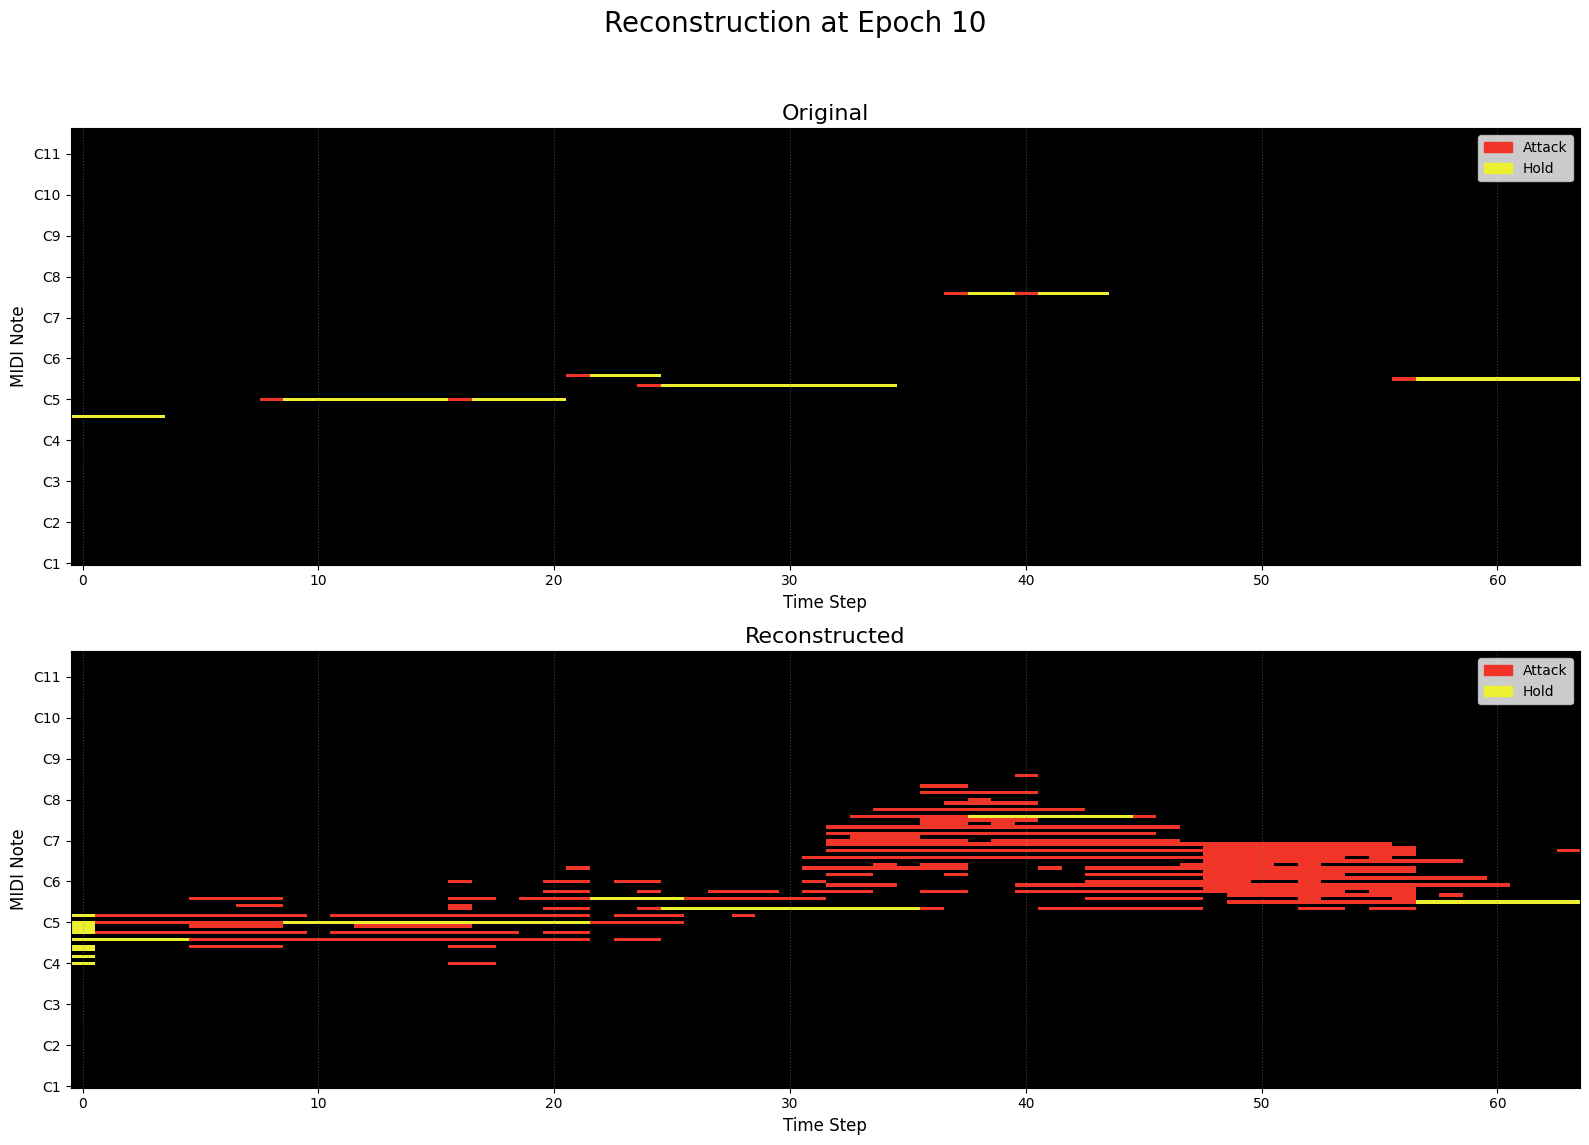

____________________________________________________________ 



Epoch 11/200 [Training]: 100%|██████████| 2935/2935 [06:20<00:00,  7.72it/s, Loss=0.2411, Recon=0.2411, KL=3.4433, beta=0.0000]



Epoch 11 Summary: Avg Train Loss: 0.1914, Avg Val Loss: 0.4716


Epoch 12/200 [Training]: 100%|██████████| 2935/2935 [06:07<00:00,  7.98it/s, Loss=0.1422, Recon=0.1422, KL=3.5976, beta=0.0000]



Epoch 12 Summary: Avg Train Loss: 0.1683, Avg Val Loss: 0.4752


Epoch 13/200 [Training]: 100%|██████████| 2935/2935 [05:57<00:00,  8.21it/s, Loss=0.1586, Recon=0.1586, KL=3.7483, beta=0.0000]



Epoch 13 Summary: Avg Train Loss: 0.1571, Avg Val Loss: 0.4803


Epoch 14/200 [Training]: 100%|██████████| 2935/2935 [06:16<00:00,  7.79it/s, Loss=0.1248, Recon=0.1248, KL=3.9026, beta=0.0000]



Epoch 14 Summary: Avg Train Loss: 0.1471, Avg Val Loss: 0.4903


Epoch 15/200 [Training]: 100%|██████████| 2935/2935 [06:34<00:00,  7.44it/s, Loss=0.1128, Recon=0.1128, KL=4.0475, beta=0.0000]



Epoch 15 Summary: Avg Train Loss: 0.1382, Avg Val Loss: 0.4944


Epoch 16/200 [Training]: 100%|██████████| 2935/2935 [06:15<00:00,  7.82it/s, Loss=0.1599, Recon=0.1599, KL=4.2168, beta=0.0000]



Epoch 16 Summary: Avg Train Loss: 0.1294, Avg Val Loss: 0.5044


Epoch 17/200 [Training]: 100%|██████████| 2935/2935 [06:00<00:00,  8.13it/s, Loss=0.0947, Recon=0.0947, KL=4.2815, beta=0.0000]



Epoch 17 Summary: Avg Train Loss: 0.1204, Avg Val Loss: 0.5069


Epoch 18/200 [Training]: 100%|██████████| 2935/2935 [05:56<00:00,  8.23it/s, Loss=0.1028, Recon=0.1028, KL=4.3775, beta=0.0000]



Epoch 18 Summary: Avg Train Loss: 0.1083, Avg Val Loss: 0.5106


Epoch 19/200 [Training]: 100%|██████████| 2935/2935 [05:50<00:00,  8.36it/s, Loss=0.0797, Recon=0.0797, KL=4.5250, beta=0.0000]



Epoch 19 Summary: Avg Train Loss: 0.1034, Avg Val Loss: 0.5135


Epoch 20/200 [Training]: 100%|██████████| 2935/2935 [06:14<00:00,  7.84it/s, Loss=0.1055, Recon=0.1055, KL=4.6261, beta=0.0000]



Epoch 20 Summary: Avg Train Loss: 0.0992, Avg Val Loss: 0.5182
Checkpoint saved to checkpoints/lofi_model_epoch_20.pth

Generating visualization for epoch 20:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


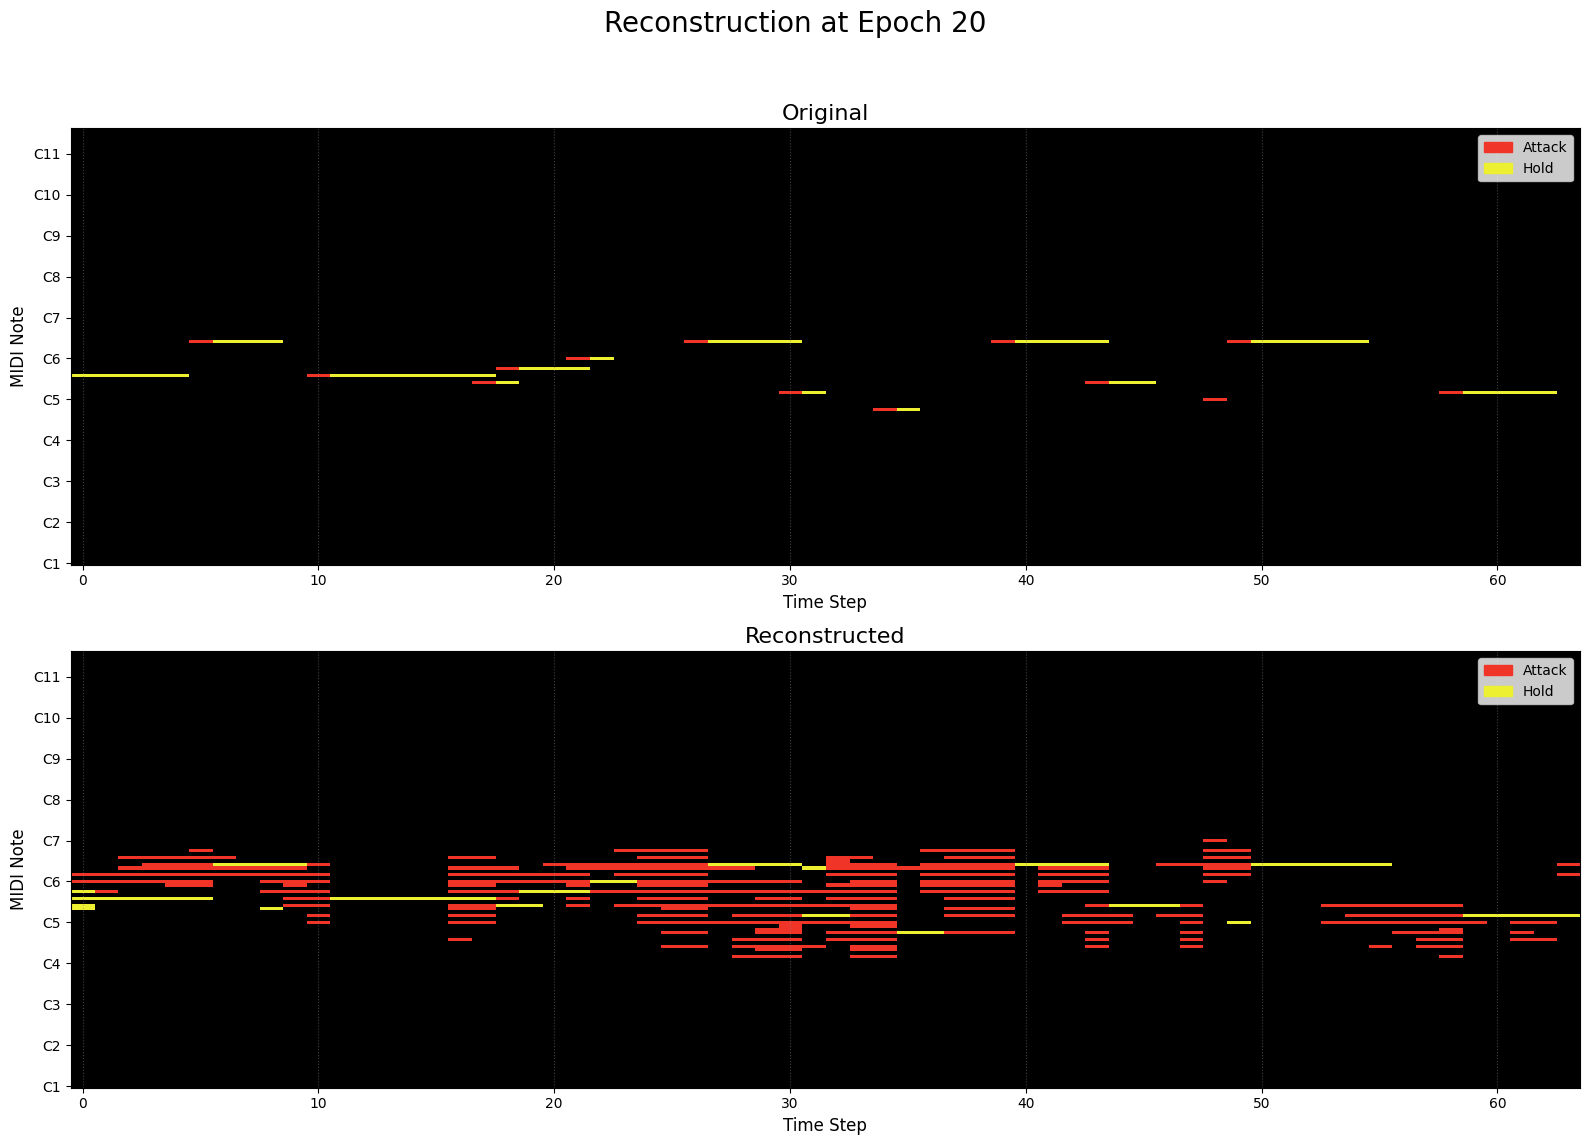

____________________________________________________________ 



Epoch 21/200 [Training]: 100%|██████████| 2935/2935 [05:55<00:00,  8.25it/s, Loss=0.0897, Recon=0.0897, KL=4.6862, beta=0.0000]



Epoch 21 Summary: Avg Train Loss: 0.0953, Avg Val Loss: 0.5233


Epoch 22/200 [Training]: 100%|██████████| 2935/2935 [07:27<00:00,  6.56it/s, Loss=0.0859, Recon=0.0859, KL=4.7927, beta=0.0000]



Epoch 22 Summary: Avg Train Loss: 0.0916, Avg Val Loss: 0.5272


Epoch 23/200 [Training]: 100%|██████████| 2935/2935 [07:33<00:00,  6.47it/s, Loss=0.0946, Recon=0.0946, KL=4.8998, beta=0.0000]



Epoch 23 Summary: Avg Train Loss: 0.0881, Avg Val Loss: 0.5305


Epoch 24/200 [Training]: 100%|██████████| 2935/2935 [05:55<00:00,  8.25it/s, Loss=0.0990, Recon=0.0990, KL=4.8140, beta=0.0000]



Epoch 24 Summary: Avg Train Loss: 0.0821, Avg Val Loss: 0.5329


Epoch 25/200 [Training]: 100%|██████████| 2935/2935 [05:52<00:00,  8.33it/s, Loss=0.1190, Recon=0.1190, KL=4.9154, beta=0.0000]



Epoch 25 Summary: Avg Train Loss: 0.0801, Avg Val Loss: 0.5356


Epoch 26/200 [Training]: 100%|██████████| 2935/2935 [05:44<00:00,  8.52it/s, Loss=0.0855, Recon=0.0855, KL=4.9480, beta=0.0000]



Epoch 26 Summary: Avg Train Loss: 0.0781, Avg Val Loss: 0.5397


Epoch 27/200 [Training]: 100%|██████████| 2935/2935 [06:01<00:00,  8.13it/s, Loss=0.0909, Recon=0.0909, KL=5.0766, beta=0.0000]



Epoch 27 Summary: Avg Train Loss: 0.0764, Avg Val Loss: 0.5440


Epoch 28/200 [Training]: 100%|██████████| 2935/2935 [05:47<00:00,  8.44it/s, Loss=0.0865, Recon=0.0865, KL=5.1077, beta=0.0000]



Epoch 28 Summary: Avg Train Loss: 0.0746, Avg Val Loss: 0.5460


Epoch 29/200 [Training]: 100%|██████████| 2935/2935 [05:41<00:00,  8.59it/s, Loss=0.0771, Recon=0.0771, KL=5.1266, beta=0.0000]



Epoch 29 Summary: Avg Train Loss: 0.0729, Avg Val Loss: 0.5479


Epoch 30/200 [Training]: 100%|██████████| 2935/2935 [08:59<00:00,  5.44it/s, Loss=0.0702, Recon=0.0702, KL=5.1286, beta=0.0000]



Epoch 30 Summary: Avg Train Loss: 0.0700, Avg Val Loss: 0.5507
Checkpoint saved to checkpoints/lofi_model_epoch_30.pth

Generating visualization for epoch 30:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


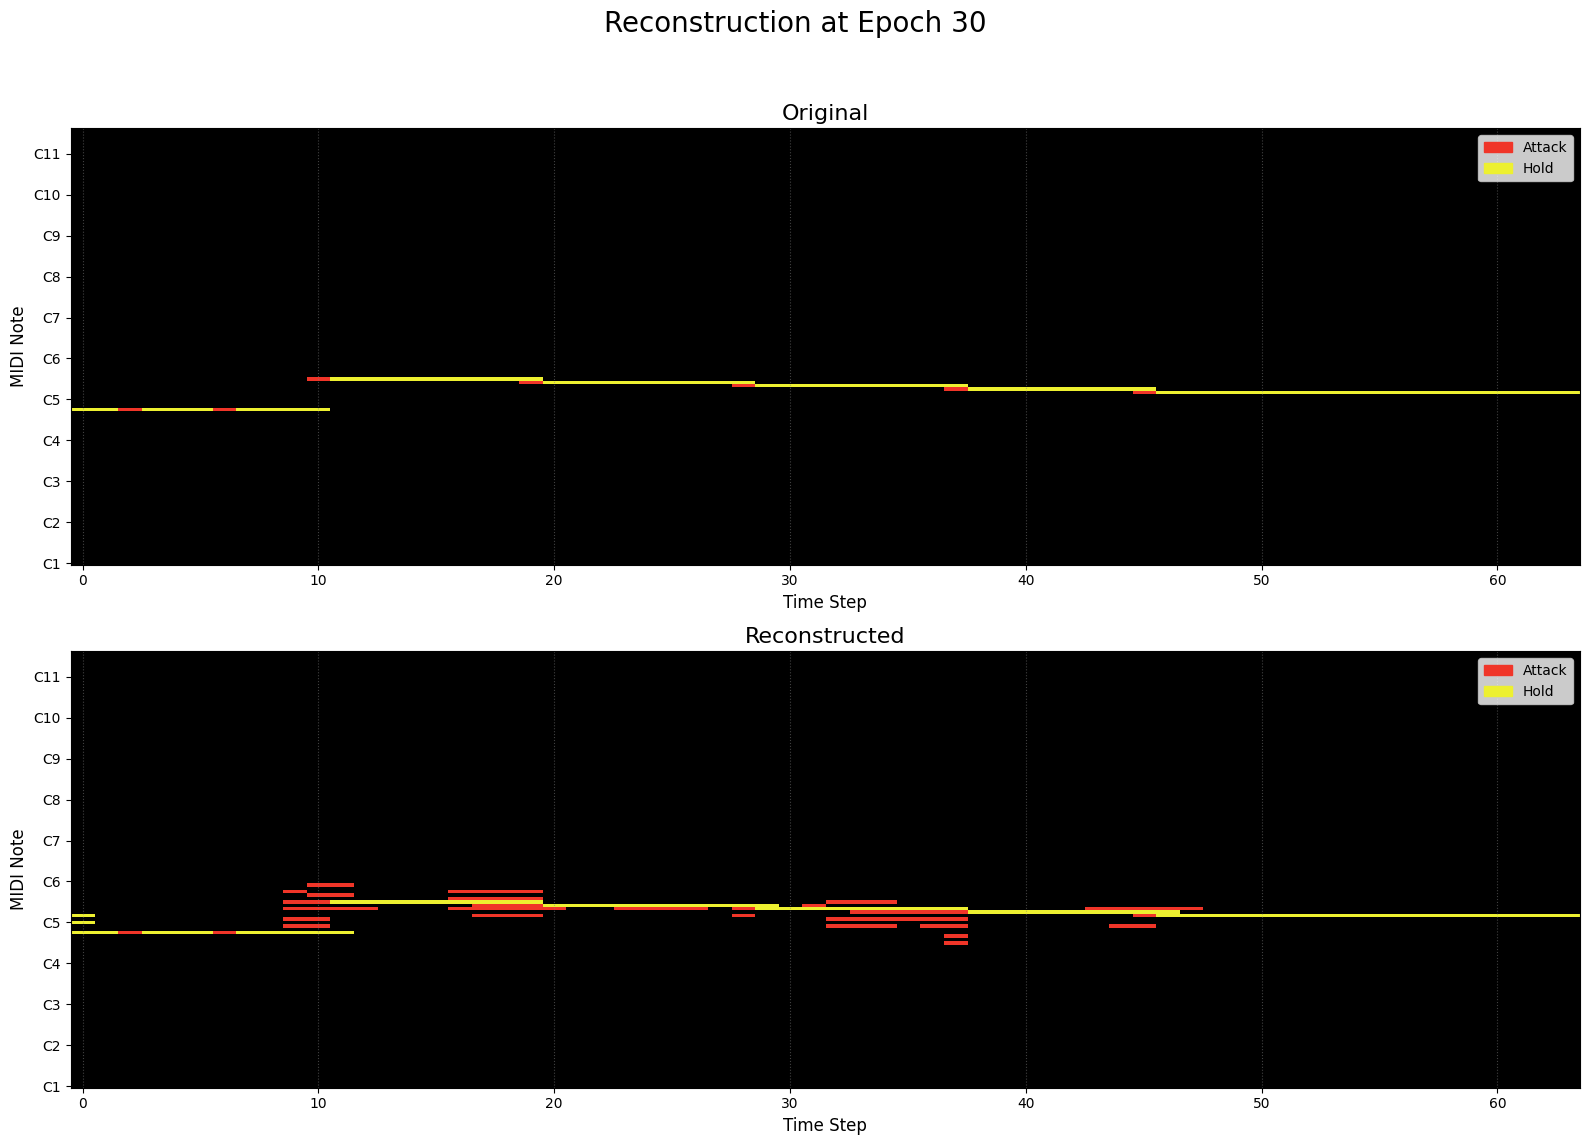

____________________________________________________________ 



Epoch 31/200 [Training]: 100%|██████████| 2935/2935 [08:57<00:00,  5.46it/s, Loss=0.1277, Recon=0.1201, KL=0.6759, beta=0.1000]



Epoch 31 Summary: Avg Train Loss: 0.1320, Avg Val Loss: 0.1347


Epoch 32/200 [Training]: 100%|██████████| 2935/2935 [08:56<00:00,  5.47it/s, Loss=0.1151, Recon=0.1123, KL=0.6278, beta=0.1000]



Epoch 32 Summary: Avg Train Loss: 0.1047, Avg Val Loss: 0.1288


Epoch 33/200 [Training]: 100%|██████████| 2935/2935 [08:57<00:00,  5.46it/s, Loss=0.1186, Recon=0.1152, KL=0.6339, beta=0.1000]



Epoch 33 Summary: Avg Train Loss: 0.1000, Avg Val Loss: 0.1261


Epoch 34/200 [Training]: 100%|██████████| 2935/2935 [09:01<00:00,  5.42it/s, Loss=0.1076, Recon=0.1076, KL=0.5856, beta=0.1000]



Epoch 34 Summary: Avg Train Loss: 0.0970, Avg Val Loss: 0.1252


Epoch 35/200 [Training]: 100%|██████████| 2935/2935 [08:52<00:00,  5.51it/s, Loss=0.1276, Recon=0.1187, KL=0.6891, beta=0.1000]



Epoch 35 Summary: Avg Train Loss: 0.0950, Avg Val Loss: 0.1218


Epoch 36/200 [Training]: 100%|██████████| 2935/2935 [08:57<00:00,  5.46it/s, Loss=0.0986, Recon=0.0951, KL=0.6347, beta=0.1000]



Epoch 36 Summary: Avg Train Loss: 0.0933, Avg Val Loss: 0.1203


Epoch 37/200 [Training]: 100%|██████████| 2935/2935 [08:55<00:00,  5.48it/s, Loss=0.1243, Recon=0.1164, KL=0.6791, beta=0.1000]



Epoch 37 Summary: Avg Train Loss: 0.0920, Avg Val Loss: 0.1201


Epoch 38/200 [Training]: 100%|██████████| 2935/2935 [08:58<00:00,  5.45it/s, Loss=0.0979, Recon=0.0979, KL=0.5946, beta=0.1000]



Epoch 38 Summary: Avg Train Loss: 0.0906, Avg Val Loss: 0.1181


Epoch 39/200 [Training]: 100%|██████████| 2935/2935 [09:02<00:00,  5.41it/s, Loss=0.1108, Recon=0.1044, KL=0.6640, beta=0.1000]



Epoch 39 Summary: Avg Train Loss: 0.0895, Avg Val Loss: 0.1172


Epoch 40/200 [Training]: 100%|██████████| 2935/2935 [08:54<00:00,  5.49it/s, Loss=0.0819, Recon=0.0754, KL=0.6650, beta=0.1000]



Epoch 40 Summary: Avg Train Loss: 0.0885, Avg Val Loss: 0.1162
Checkpoint saved to checkpoints/lofi_model_epoch_40.pth

Generating visualization for epoch 40:
Converting tensor to MIDI file at reconstructed/reconstructed.mid...
MIDI file saved successfully.


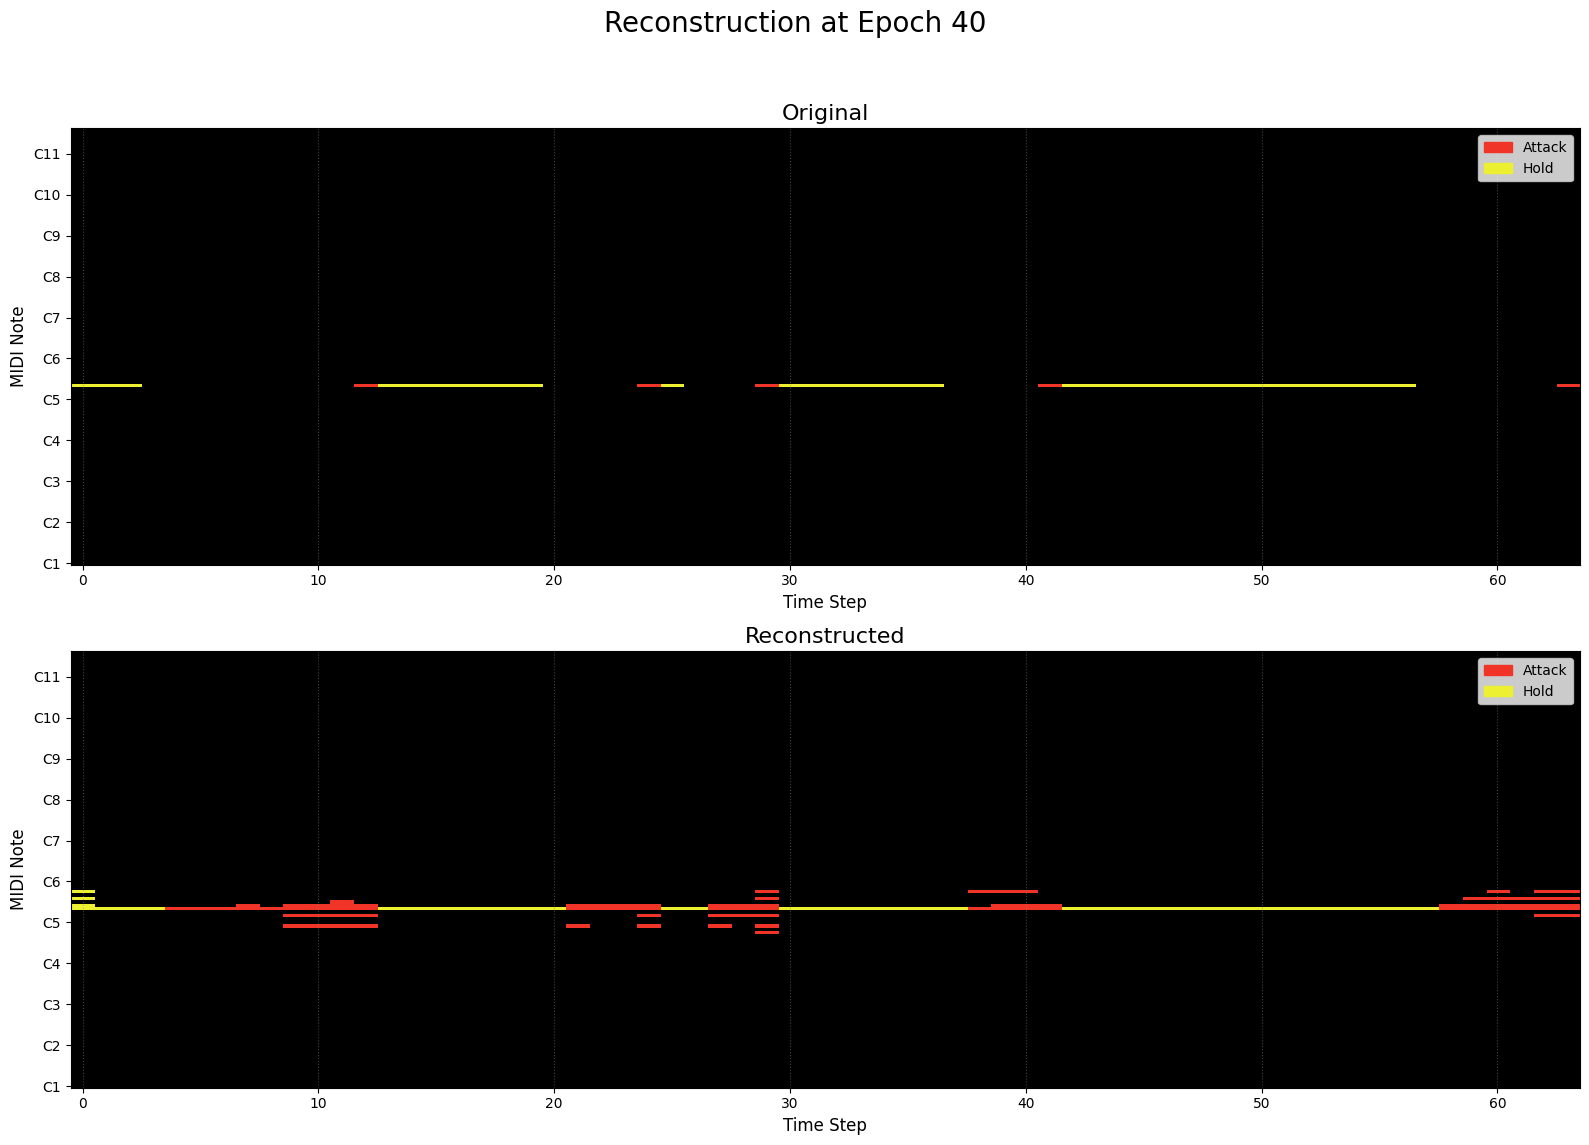

____________________________________________________________ 



Epoch 41/200 [Training]: 100%|██████████| 2935/2935 [08:58<00:00,  5.45it/s, Loss=0.1308, Recon=0.1283, KL=0.6248, beta=0.1000]



Epoch 41 Summary: Avg Train Loss: 0.0874, Avg Val Loss: 0.1171


Epoch 42/200 [Training]: 100%|██████████| 2935/2935 [08:51<00:00,  5.52it/s, Loss=0.0506, Recon=0.0506, KL=0.5247, beta=0.1000]



Epoch 42 Summary: Avg Train Loss: 0.0865, Avg Val Loss: 0.1166


Epoch 43/200 [Training]: 100%|██████████| 2935/2935 [08:51<00:00,  5.53it/s, Loss=0.0795, Recon=0.0773, KL=0.6229, beta=0.1000]



Epoch 43 Summary: Avg Train Loss: 0.0857, Avg Val Loss: 0.1152


Epoch 44/200 [Training]: 100%|██████████| 2935/2935 [08:47<00:00,  5.56it/s, Loss=0.0866, Recon=0.0866, KL=0.5392, beta=0.1000]



Epoch 44 Summary: Avg Train Loss: 0.0849, Avg Val Loss: 0.1142


Epoch 45/200 [Training]: 100%|██████████| 2935/2935 [08:43<00:00,  5.61it/s, Loss=0.1160, Recon=0.1030, KL=0.7305, beta=0.1000]



Epoch 45 Summary: Avg Train Loss: 0.0839, Avg Val Loss: 0.1134


Epoch 46/200 [Training]: 100%|██████████| 2935/2935 [08:47<00:00,  5.56it/s, Loss=0.0976, Recon=0.0972, KL=0.6043, beta=0.1000]



Epoch 46 Summary: Avg Train Loss: 0.0832, Avg Val Loss: 0.1132


Epoch 47/200 [Training]: 100%|██████████| 2935/2935 [08:36<00:00,  5.68it/s, Loss=0.0803, Recon=0.0763, KL=0.6396, beta=0.1000]



Epoch 47 Summary: Avg Train Loss: 0.0825, Avg Val Loss: 0.1135


Epoch 48/200 [Training]:  59%|█████▉    | 1726/2935 [05:03<03:31,  5.70it/s, Loss=0.0854, Recon=0.0854, KL=0.5451, beta=0.1000]

In [ ]:
train(model, experiment_name="model with teacher forcing")